# Making better regression models with grid search

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load dataset
df = pd.read_csv('glass.csv')
df = df.sample(frac=1, random_state = None)             # shuffle the rows just in case
print(df.shape)
df.head()

(214, 11)


,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
60,61,1.51905,13.60,3.62,1.11,72.64,0.14,8.76,0.00,0.00,1
100,101,1.51655,12.75,2.85,1.44,73.27,0.57,8.79,0.11,0.22,2
69,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1
53,54,1.51837,13.14,2.84,1.28,72.85,0.55,9.07,0.00,0.00,1
130,131,1.52177,13.75,1.01,1.36,72.19,0.33,11.14,0.00,0.00,2


In [3]:
df_test = df.drop(df.columns[[0, 10]], axis=1)
print(df_test.shape)
df_test.head()

(214, 9)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
60,1.51905,13.60,3.62,1.11,72.64,0.14,8.76,0.00,0.00
100,1.51655,12.75,2.85,1.44,73.27,0.57,8.79,0.11,0.22
69,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
53,1.51837,13.14,2.84,1.28,72.85,0.55,9.07,0.00,0.00
130,1.52177,13.75,1.01,1.36,72.19,0.33,11.14,0.00,0.00


In [4]:
X = df_test.iloc[:, 1:]
y = df_test.iloc[:, :1]

In [5]:
X.head()

,Na,Mg,Al,Si,K,Ca,Ba,Fe
60,13.60,3.62,1.11,72.64,0.14,8.76,0.00,0.00
100,12.75,2.85,1.44,73.27,0.57,8.79,0.11,0.22
69,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
53,13.14,2.84,1.28,72.85,0.55,9.07,0.00,0.00
130,13.75,1.01,1.36,72.19,0.33,11.14,0.00,0.00


In [6]:
y.head()

,RI
60,1.51905
100,1.51655
69,1.52300
53,1.51837
130,1.52177


In [7]:
# split train and test in the fixed test size with random order
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = None)

In [8]:
#print(X_train, y_train)

### 1. Use default models

## Try regressors
model list :    https://scikit-learn.org/stable/supervised_learning.html

In [9]:
# import regression models
from sklearn.ensemble import RandomForestRegressor                       # for Random Forest
from sklearn.linear_model import Ridge                                   # for Ridge
from sklearn.ensemble import GradientBoostingRegressor                   # for Gradient Boosting
from sklearn.gaussian_process import GaussianProcessRegressor            # for Gaussian Process
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.neural_network import MLPRegressor                          # for Multi layer Perceptron
from sklearn.svm import SVR                                              # for Support vector machine

In [10]:
# building Models (default condition)
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    randfr  = RandomForestRegressor().fit(X_train, y_train)                  # for Random Forest
    ridger  = Ridge().fit(X_train, y_train)                                  # for Ridge
    grdbtr  = GradientBoostingRegressor().fit(X_train, y_train)              # for Gradient Boosting
    kernel  = DotProduct() + WhiteKernel()                                   # for Gaussian Process
    gaussr  = GaussianProcessRegressor(kernel=kernel).fit(X_train, y_train)
    mlpctr  = MLPRegressor().fit(X_train, y_train)                           # for Multi layer Perceptron
    svmr    = SVR().fit(X_train, y_train)                                    # for Support vector machine

In [11]:
# import evaluation metrics for models
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# predicted value of X_test
y_pred_randf = randfr.predict(X_test)
y_pred_ridge = ridger.predict(X_test)
y_pred_grdbt = grdbtr.predict(X_test)
y_pred_gauss = gaussr.predict(X_test)
y_pred_mlpct = mlpctr.predict(X_test)
y_pred_svm   = svmr.predict(X_test)

# predicted value of X_train
y_obsv_randf = randfr.predict(X_train)
y_obsv_ridge = ridger.predict(X_train)
y_obsv_grdbt = grdbtr.predict(X_train)
y_obsv_gauss = gaussr.predict(X_train)
y_obsv_mlpct = mlpctr.predict(X_train)
y_obsv_svm   = svmr.predict(X_train)

# R2
R2_randf = r2_score(y_test, y_pred_randf)
R2_ridge = r2_score(y_test, y_pred_ridge)
R2_grdbt = r2_score(y_test, y_pred_grdbt)
R2_gauss = r2_score(y_test, y_pred_gauss)
R2_mlpct = r2_score(y_test, y_pred_mlpct)
R2_svm   = r2_score(y_test, y_pred_svm)

# score = R2
scr_randf = randfr.score(X_test, y_test)
scr_ridge = ridger.score(X_test, y_test)
scr_grdbt = grdbtr.score(X_test, y_test)
scr_gauss = gaussr.score(X_test, y_test)
scr_mlpct = mlpctr.score(X_test, y_test)
scr_svm   = svmr.score(X_test, y_test)

# RMSE
rsme_randf = np.sqrt(mean_squared_error(y_test, y_pred_randf))
rsme_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
rsme_grdbt = np.sqrt(mean_squared_error(y_test, y_pred_grdbt))
rsme_gauss = np.sqrt(mean_squared_error(y_test, y_pred_gauss))
rsme_mlpct = np.sqrt(mean_squared_error(y_test, y_pred_mlpct))
rsme_svm   = np.sqrt(mean_squared_error(y_test, y_pred_svm))

In [12]:
# print R square
print('                      test score      R2:')
print('Random Forest          = {:.4}'.format(scr_randf), '      {:.4}'.format(R2_randf))
print('Ridge                  = {:.4}'.format(scr_ridge), '      {:.4}'.format(R2_ridge))
print('Gradient Boosting      = {:.4}'.format(scr_grdbt), '      {:.4}'.format(R2_grdbt))
print('Gaussian Process       = {:.4}'.format(scr_gauss), '      {:.4}'.format(R2_gauss))
print('Multi Layer Perceptron = {:.4}'.format(scr_mlpct), '      {:.4}'.format(R2_mlpct))
print('SVM                    = {:.4}'.format(scr_svm),   '      {:.4}'.format(R2_svm))

                      test score      R2:
Random Forest          = 0.6094       0.6094
Ridge                  = 0.818       0.818
Gradient Boosting      = 0.7057       0.7057
Gaussian Process       = 0.8151       0.8151
Multi Layer Perceptron = -6.438e+05       -6.438e+05
SVM                    = -1.945       -1.945


In [13]:
# print root mean square error (RMSE)
print('                          RMSE :')
print('Random Forest          = {:.5}'.format(rsme_randf))
print('Ridge                  = {:.5}'.format(rsme_ridge))
print('Gradient Boosting      = {:.5}'.format(rsme_grdbt))
print('Gaussian Process       = {:.5}'.format(rsme_gauss))
print('Multi Layer Perceptron = {:.5}'.format(rsme_mlpct))
print('SVM                    = {:.5}'.format(rsme_svm))

                          RMSE :
Random Forest          = 0.0016359
Ridge                  = 0.0011169
Gradient Boosting      = 0.0014201
Gaussian Process       = 0.0011257
Multi Layer Perceptron = 2.1002
SVM                    = 0.0044918


Observed vs. Predicted values plot


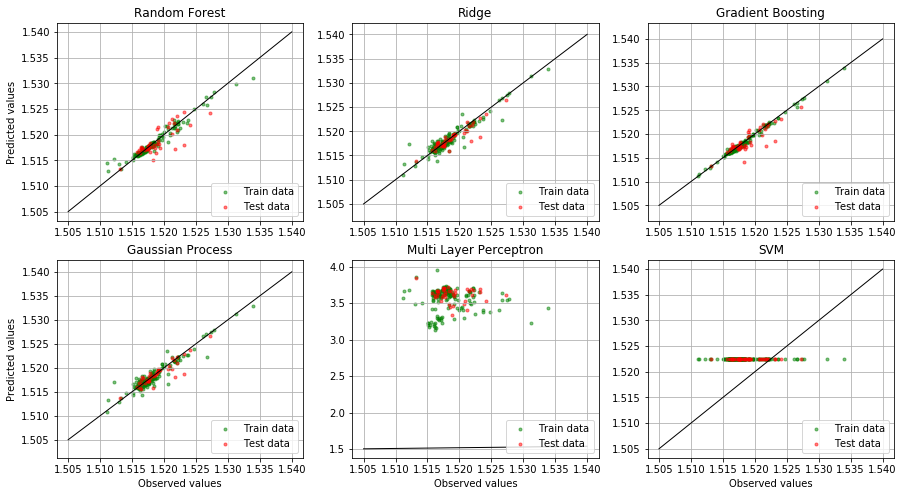

                      test score      RMSE:
Random Forest          = 0.6094       0.001636
Ridge                  = 0.818       0.001117
Gradient Boosting      = 0.7057       0.00142
Gaussian Process       = 0.8151       0.001126
Multi Layer Perceptron = -6.438e+05       2.1
SVM                    = -1.945       0.004492


In [14]:
# draw observed and predicted values for both train and test sets
print('Observed vs. Predicted values plot')

x_obsv = (1.505, 1.54)
y_pred = (1.505, 1.54)

plt.figure(figsize = (15, 8))
plt.subplot(2, 3, 1)
plt.scatter(y_train, y_obsv_randf, c = 'g', marker = '.', alpha = 0.5, label = 'Train data')
plt.scatter(y_test,  y_pred_randf,  c = 'r', marker = '.', alpha = 0.5, label = 'Test data')
plt.plot([x_obsv[0], x_obsv[1]], [y_pred[0], y_pred[1]], color = "black", lw= 1), plt.legend(loc = 'lower right')
plt.title('Random Forest'), plt.ylabel('Predicted values'), plt.grid()

plt.subplot(2, 3, 2)
plt.scatter(y_train, y_obsv_ridge, c = 'g', marker = '.', alpha = 0.5, label = 'Train data')
plt.scatter(y_test,  y_pred_ridge,  c = 'r', marker = '.', alpha = 0.5, label = 'Test data')
plt.plot([x_obsv[0], x_obsv[1]], [y_pred[0], y_pred[1]], color = "black", lw= 1), plt.legend(loc = 'lower right')
plt.title('Ridge'), plt.grid()

plt.subplot(2, 3, 3)
plt.scatter(y_train, y_obsv_grdbt, c = 'g', marker = '.', alpha = 0.5, label = 'Train data')
plt.scatter(y_test,  y_pred_grdbt,  c = 'r', marker = '.', alpha = 0.5, label = 'Test data')
plt.plot([x_obsv[0], x_obsv[1]], [y_pred[0], y_pred[1]], color = "black", lw= 1), plt.legend(loc = 'lower right')
plt.title('Gradient Boosting'), plt.grid()

plt.subplot(2, 3, 4)
plt.scatter(y_train, y_obsv_gauss, c = 'g', marker = '.', alpha = 0.5, label = 'Train data')
plt.scatter(y_test,  y_pred_gauss,  c = 'r', marker = '.', alpha = 0.5, label = 'Test data')
plt.plot([x_obsv[0], x_obsv[1]], [y_pred[0], y_pred[1]], color = "black", lw= 1), plt.legend(loc = 'lower right')
plt.title('Gaussian Process'), plt.ylabel('Predicted values'), plt.xlabel('Observed values'), plt.grid()

plt.subplot(2, 3, 5)
plt.scatter(y_train, y_obsv_mlpct, c = 'g', marker = '.', alpha = 0.5, label = 'Train data')
plt.scatter(y_test,  y_pred_mlpct,  c = 'r', marker = '.', alpha = 0.5, label = 'Test data')
plt.plot([x_obsv[0], x_obsv[1]], [y_pred[0], y_pred[1]], color = "black", lw= 1), plt.legend(loc = 'lower right')
plt.title('Multi Layer Perceptron'), plt.xlabel('Observed values'), plt.grid()

plt.subplot(2, 3, 6)
plt.scatter(y_train, y_obsv_svm, c = 'g', marker = '.', alpha = 0.5, label = 'Train data')
plt.scatter(y_test,  y_pred_svm,  c = 'r', marker = '.', alpha = 0.5, label = 'Test data')
plt.plot([x_obsv[0], x_obsv[1]], [y_pred[0], y_pred[1]], color = "black", lw= 1), plt.legend(loc = 'lower right')
plt.title('SVM'), plt.xlabel('Observed values'), plt.grid()

plt.show()

# print R square and RMSE
print('                      test score      RMSE:')
print('Random Forest          = {:.4}'.format(scr_randf), '      {:.4}'.format(rsme_randf))
print('Ridge                  = {:.4}'.format(scr_ridge), '      {:.4}'.format(rsme_ridge))
print('Gradient Boosting      = {:.4}'.format(scr_grdbt), '      {:.4}'.format(rsme_grdbt))
print('Gaussian Process       = {:.4}'.format(scr_gauss), '      {:.4}'.format(rsme_gauss))
print('Multi Layer Perceptron = {:.4}'.format(scr_mlpct), '      {:.4}'.format(rsme_mlpct))
print('SVM                    = {:.4}'.format(scr_svm),   '      {:.4}'.format(rsme_svm))

### 2. Perform hyper parameter tuning using grid-search with cross validation

In [15]:
from sklearn.model_selection import GridSearchCV

random forest regressor : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [16]:
# grid search for Random Forest
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    parameters = {"n_estimators":[10, 30, 100, 300],
                  "criterion":["mse","mae"],
                  "max_depth":[1,3,10,30]}

    grid_search = sklearn.model_selection.GridSearchCV(RandomForestRegressor(), parameters, cv=5)
    randf_grds = grid_search.fit(X_train, y_train)

    randf_best = randf_grds.best_estimator_                     # determine the best estimator
    randf_grds.best_params_

In [17]:
print('score: {:.2%}'.format(randf_best.score(X_test, y_test)))

score: 59.73%


Comparison of random forest default and tuned


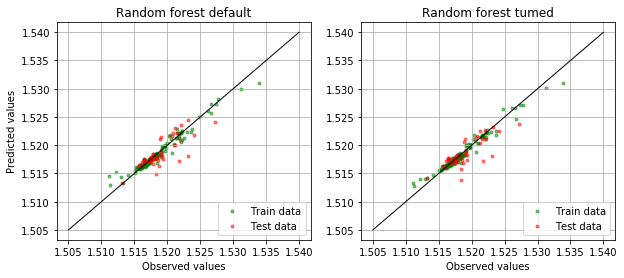

In [18]:
# draw random foest default and tuned
y_pred_randf_best   = randf_best.predict(X_test)  # predicted randf_best value of X_test
y_obsv_randf_best   = randf_best.predict(X_train) # predicted randf_best value of X_train

print('Comparison of random forest default and tuned')
plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_obsv_randf, c = 'g', marker = '.', alpha = 0.5, label = 'Train data')
plt.scatter(y_test,  y_pred_randf,  c = 'r', marker = '.', alpha = 0.5, label = 'Test data')
plt.plot([x_obsv[0], x_obsv[1]], [y_pred[0], y_pred[1]], color = "black", lw= 1), plt.legend(loc = 'lower right')
plt.title('Random forest default'), plt.xlabel('Observed values'), plt.ylabel('Predicted values'), plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(y_train, y_obsv_randf_best, c = 'g', marker = '.', alpha = 0.5, label = 'Train data')
plt.scatter(y_test,  y_pred_randf_best,  c = 'r', marker = '.', alpha = 0.5, label = 'Test data')
plt.plot([x_obsv[0], x_obsv[1]], [y_pred[0], y_pred[1]], color = "black", lw= 1), plt.legend(loc = 'lower right')
plt.title('Random forest tumed'), plt.xlabel('Observed values'), plt.grid()

plt.show()

Ridge : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [19]:
# grid search for Ridge

parameters = {"alpha":[0.001, 0.003, 0.01, 0.03, 0.1],
              "normalize":['True','False'],
              "fit_intercept":['True', 'False']}

grid_search = sklearn.model_selection.GridSearchCV(Ridge(), parameters, cv=5)
ridge_grds = grid_search.fit(X_train, y_train)

ridge_best = ridge_grds.best_estimator_                     # determine the best estimator
ridge_grds.best_params_

C:\Users\mmm\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 0.1, 'fit_intercept': 'True', 'normalize': 'True'}

In [20]:
print('score: {:.2%}'.format(ridge_best.score(X_test, y_test)))

score: 79.94%


Comparison of random forest default and tuned


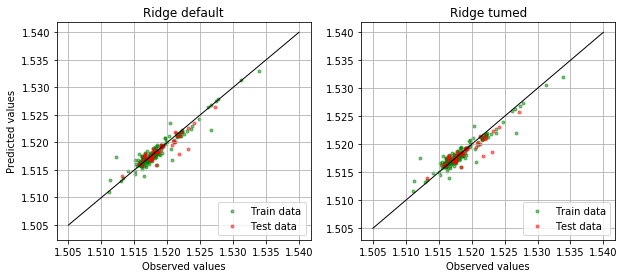

In [21]:
# draw random foest default and tuned
y_pred_ridge_best   = ridge_best.predict(X_test)  # predicted ridge_best value of X_test
y_obsv_ridge_best   = ridge_best.predict(X_train) # predicted ridge_best value of X_train

print('Comparison of random forest default and tuned')
plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_obsv_ridge, c = 'g', marker = '.', alpha = 0.5, label = 'Train data')
plt.scatter(y_test,  y_pred_ridge,  c = 'r', marker = '.', alpha = 0.5, label = 'Test data')
plt.plot([x_obsv[0], x_obsv[1]], [y_pred[0], y_pred[1]], color = "black", lw= 1), plt.legend(loc = 'lower right')
plt.title('Ridge default'), plt.xlabel('Observed values'), plt.ylabel('Predicted values'), plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(y_train, y_obsv_ridge_best, c = 'g', marker = '.', alpha = 0.5, label = 'Train data')
plt.scatter(y_test,  y_pred_ridge_best,  c = 'r', marker = '.', alpha = 0.5, label = 'Test data')
plt.plot([x_obsv[0], x_obsv[1]], [y_pred[0], y_pred[1]], color = "black", lw= 1), plt.legend(loc = 'lower right')
plt.title('Ridge tumed'), plt.xlabel('Observed values'), plt.grid()

plt.show()

gradient boosting regressor : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

In [22]:
# grid search for Gradient boosting
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    parameters = {"loss":['ls','lad'], 
                  "learning_rate":[0.01, 0.03, 0.1],
                  "n_estimators":[10, 30, 100, 300, 1000],
                  "criterion":["friedman_mse","mse"] }

    grid_search = sklearn.model_selection.GridSearchCV(GradientBoostingRegressor(), parameters, cv=5)
    grdbt_grds = grid_search.fit(X_train, y_train)

    grdbt_best = grdbt_grds.best_estimator_                     # determine the best estimator
    grdbt_grds.best_params_

In [23]:
print('score: {:.2%}'.format(grdbt_best.score(X_test, y_test)))

score: 70.33%


Comparison of random forest default and tuned


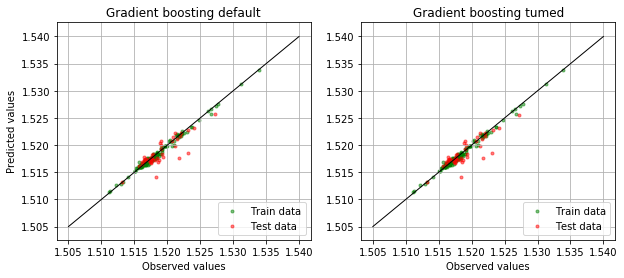

In [24]:
# draw random foest default and tuned
y_pred_grdbt_best   = grdbt_best.predict(X_test)  # predicted ridge_best value of X_test
y_obsv_grdbt_best   = grdbt_best.predict(X_train) # predicted ridge_best value of X_train

print('Comparison of random forest default and tuned')
plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_obsv_grdbt, c = 'g', marker = '.', alpha = 0.5, label = 'Train data')
plt.scatter(y_test,  y_pred_grdbt,  c = 'r', marker = '.', alpha = 0.5, label = 'Test data')
plt.plot([x_obsv[0], x_obsv[1]], [y_pred[0], y_pred[1]], color = "black", lw= 1), plt.legend(loc = 'lower right')
plt.title('Gradient boosting default'), plt.xlabel('Observed values'), plt.ylabel('Predicted values'), plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(y_train, y_obsv_grdbt_best, c = 'g', marker = '.', alpha = 0.5, label = 'Train data')
plt.scatter(y_test,  y_pred_grdbt_best,  c = 'r', marker = '.', alpha = 0.5, label = 'Test data')
plt.plot([x_obsv[0], x_obsv[1]], [y_pred[0], y_pred[1]], color = "black", lw= 1), plt.legend(loc = 'lower right')
plt.title('Gradient boosting tumed'), plt.xlabel('Observed values'), plt.grid()

plt.show()

multi layer perceptron (MLP) : https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

In [25]:
# grid search for MLP
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    parameters = {"hidden_layer_sizes":[(100,100),(100,200,100),(100,200,200,100)],              
                  "activation":['tanh','relu'],
                  "solver":['adam'],
                  "max_iter":[10000],
                  "batch_size":['auto']}

    grid_search = sklearn.model_selection.GridSearchCV(MLPRegressor(), parameters, cv=5)
    mlpct_grds = grid_search.fit(X_train, y_train)

    mlpct_best = mlpct_grds.best_estimator_                     # determine the best estimator
    mlpct_grds.best_params_

In [26]:
print('score: {:.2%}'.format(mlpct_best.score(X_test, y_test)))

score: -24703.66%


Comparison of random forest default and tuned


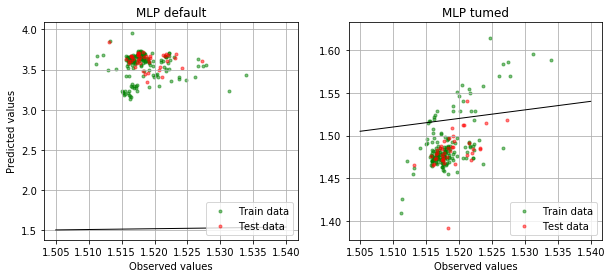

In [27]:
# draw random foest default and tuned
y_pred_mlpct_best   = mlpct_best.predict(X_test)  # predicted ridge_best value of X_test
y_obsv_mlpct_best   = mlpct_best.predict(X_train) # predicted ridge_best value of X_train

print('Comparison of random forest default and tuned')
plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_obsv_mlpct, c = 'g', marker = '.', alpha = 0.5, label = 'Train data')
plt.scatter(y_test,  y_pred_mlpct,  c = 'r', marker = '.', alpha = 0.5, label = 'Test data')
plt.plot([x_obsv[0], x_obsv[1]], [y_pred[0], y_pred[1]], color = "black", lw= 1), plt.legend(loc = 'lower right')
plt.title('MLP default'), plt.xlabel('Observed values'), plt.ylabel('Predicted values'), plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(y_train, y_obsv_mlpct_best, c = 'g', marker = '.', alpha = 0.5, label = 'Train data')
plt.scatter(y_test,  y_pred_mlpct_best,  c = 'r', marker = '.', alpha = 0.5, label = 'Test data')
plt.plot([x_obsv[0], x_obsv[1]], [y_pred[0], y_pred[1]], color = "black", lw= 1), plt.legend(loc = 'lower right')
plt.title('MLP tumed'), plt.xlabel('Observed values'), plt.grid()

plt.show()

SVM : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [28]:
# grid search for SVM regressor
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    parameters = {"kernel":['rbf'],              
                  "gamma":[0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1],              
                  "C":[10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0, 10000.0],
                  "epsilon":[0.01, 0.03, 0.1, 0.3, 1.0]}

    grid_search = sklearn.model_selection.GridSearchCV(SVR(), parameters, cv=5)
    svm_grds = grid_search.fit(X_train, y_train)

    svm_best = svm_grds.best_estimator_                     # determine the best estimator
    svm_grds.best_params_

In [29]:
print('score: {:.2%}'.format(svm_best.score(X_test, y_test)))

score: -155.31%


Comparison of SVM default and tuned


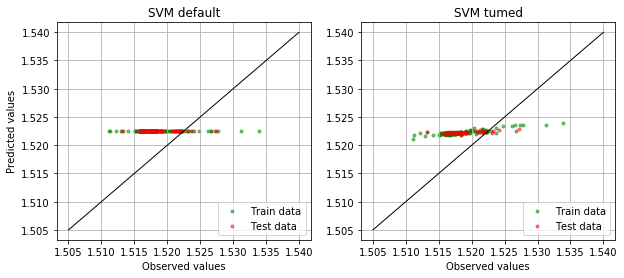

In [30]:
# draw svm default and svm tuned
y_pred_svm_best   = svm_best.predict(X_test)  # predicted svm_best value of X_test
y_obsv_svm_best   = svm_best.predict(X_train) # predicted svm_best value of X_train

print('Comparison of SVM default and tuned')
plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_obsv_svm, c = 'g', marker = '.', alpha = 0.5, label = 'Train data')
plt.scatter(y_test,  y_pred_svm,  c = 'r', marker = '.', alpha = 0.5, label = 'Test data')
plt.plot([x_obsv[0], x_obsv[1]], [y_pred[0], y_pred[1]], color = "black", lw= 1), plt.legend(loc = 'lower right')
plt.title('SVM default'), plt.xlabel('Observed values'), plt.ylabel('Predicted values'), plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(y_train, y_obsv_svm_best, c = 'g', marker = '.', alpha = 0.5, label = 'Train data')
plt.scatter(y_test,  y_pred_svm_best,  c = 'r', marker = '.', alpha = 0.5, label = 'Test data')
plt.plot([x_obsv[0], x_obsv[1]], [y_pred[0], y_pred[1]], color = "black", lw= 1), plt.legend(loc = 'lower right')
plt.title('SVM tumed'), plt.xlabel('Observed values'), plt.grid()

plt.show()